In [8]:
pip install tensorflow

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
train = pd.read_csv('digtrain.csv')
test = pd.read_csv('digtest.csv')

In [14]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
x_train = train.drop(['label'],axis=1).astype('float32')
y_train = train['label'].astype('float32')
x_test = test.astype('float32')

In [17]:
print(f"We have {len(x_train)} images in the training set and {len(x_test)} images in the test set.")

We have 42000 images in the training set and 28000 images in the test set.


In [18]:
x_train.shape

(42000, 784)

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples


In [21]:
num_classes = 10
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)

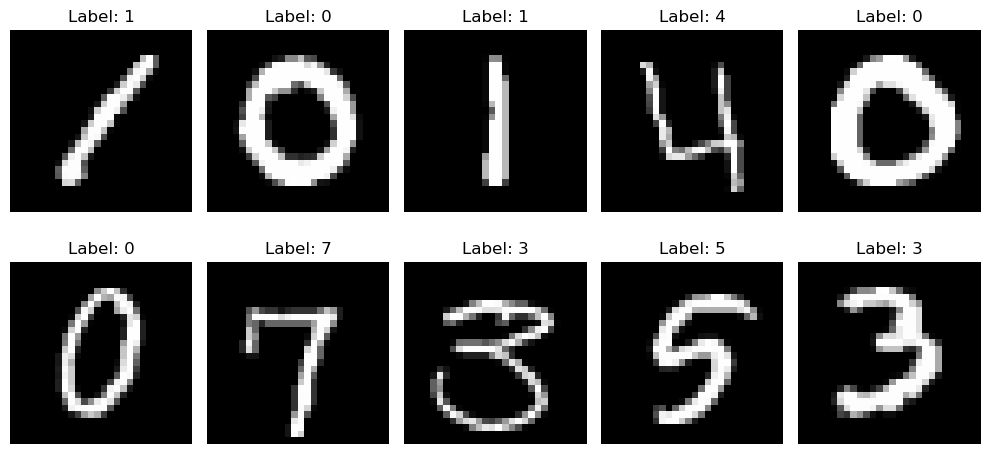

In [22]:
num_images = 10
images = x_train[:num_images]
labels = y_train[:num_images]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(num_images):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(np.argmax(labels[i])))

plt.tight_layout()
plt.show()

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [24]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
296/296 [==============================] - 24s 66ms/step - loss: 0.4479 - accuracy: 0.8645 - val_loss: 0.1133 - val_accuracy: 0.9671
Epoch 2/20
296/296 [==============================] - 19s 65ms/step - loss: 0.1263 - accuracy: 0.9620 - val_loss: 0.0765 - val_accuracy: 0.9762
Epoch 3/20
296/296 [==============================] - 18s 62ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.0582 - val_accuracy: 0.9824
Epoch 4/20
296/296 [==============================] - 20s 68ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 5/20
296/296 [==============================] - 20s 66ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 6/20
296/296 [==============================] - 20s 68ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.0434 - val_accuracy: 0.9869
Epoch 7/20
296/296 [==============================] - 20s 68ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0415 - val_accuracy:

In [25]:
predictions = model.predict(x_test)

875/875 [==============================] - 9s 7ms/step


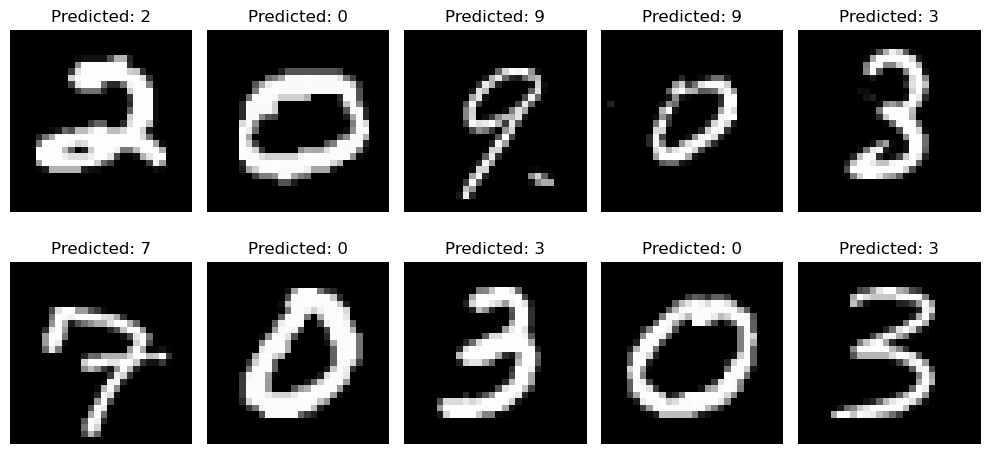

In [26]:
num_images = 10

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(num_images):
    
    predicted_label = np.argmax(predictions[i])
    
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Predicted: {}'.format(predicted_label))

plt.tight_layout()
plt.show()

In [27]:
result=np.argmax(predictions,axis=1)
result=pd.Series(result,name='Label')

submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),result],axis=1)
submission.to_csv('submission.csv',index=False)